In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)  # cannot include test data
train_data -= mean  # 去均值
std = train_data.std(axis=0)
train_data /= std  # z-score normalization
test_data -= mean  # use training data statistics for normalization
test_data /= std

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  # mse: mean squared error, mae: mean absolute error
    return model

model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)  # verbose: output log

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


102/102 [==============================] - 0s 128us/step


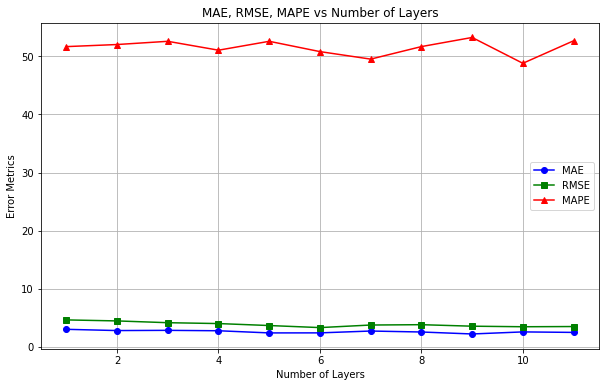

Results Table: MAE, RMSE, and MAPE for Different Number of Layers

    Number of Layers  Test MAE  Test RMSE  Test MAPE (%)
0                  1  3.005539   4.625431      51.674210
1                  2  2.791444   4.450761      52.033695
2                  3  2.828023   4.144701      52.587705
3                  4  2.758392   3.995395      51.058778
4                  5  2.385472   3.656745      52.588753
5                  6  2.393807   3.301838      50.814708
6                  7  2.710125   3.744655      49.521559
7                  8  2.542797   3.803461      51.678770
8                  9  2.203724   3.543423      53.249396
9                 10  2.559923   3.448390      48.802384
10                11  2.474550   3.484118      52.676093


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error
from keras import backend as K

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)  
train_data -= mean  
std = train_data.std(axis=0)
train_data /= std  
test_data -= mean  
test_data /= std


def build_model(num_layers):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    
    for _ in range(num_layers - 1):  
        model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(1))  
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  
    return model

layer_counts = range(1, 12)  
mae_scores = []
rmse_scores = []
mape_scores = []

for num_layers in layer_counts:
    model = build_model(num_layers)
    model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)  

    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=0)
    
    test_predictions = model.predict(test_data)
    
    rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))  # RMSE
    mape = np.mean(np.abs((test_targets - test_predictions) / test_targets)) * 100  # MAPE
    
    mae_scores.append(test_mae_score)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

plt.figure(figsize=(10, 6))
plt.plot(layer_counts, mae_scores, marker='o', color='b', label='MAE')  # MAE
plt.plot(layer_counts, rmse_scores, marker='s', color='g', label='RMSE')  # RMSE
plt.plot(layer_counts, mape_scores, marker='^', color='r', label='MAPE')  # MAPE
plt.title('MAE, RMSE, MAPE vs Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Error Metrics')
plt.legend()
plt.grid(True)
plt.show()

import pandas as pd
results_df = pd.DataFrame({
    "Number of Layers": layer_counts,
    "Test MAE": mae_scores,
    "Test RMSE": rmse_scores,
    "Test MAPE (%)": mape_scores
})

print("Results Table: MAE, RMSE, and MAPE for Different Number of Layers\n")
print(results_df)

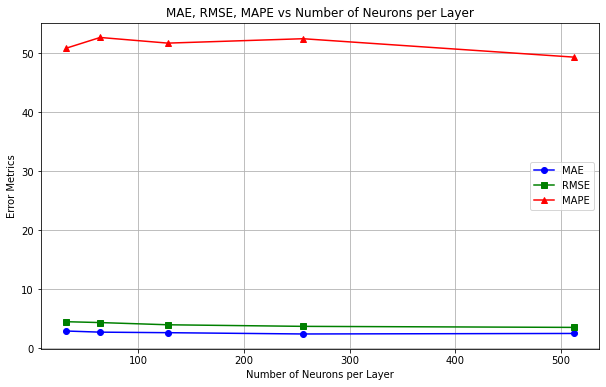

Results Table: MAE, RMSE, and MAPE for Different Number of Neurons per Layer

   Layer Size  Test MAE  Test RMSE  Test MAPE (%)
0          32  2.938746   4.515669      50.885809
1          64  2.745710   4.370783      52.699400
2         128  2.655792   3.996101      51.741281
3         256  2.436797   3.728182      52.487084
4         512  2.524158   3.552550      49.370127


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)  
train_data -= mean  
std = train_data.std(axis=0)
train_data /= std 
test_data -= mean  
test_data /= std

def build_model(layer_size, num_layers):
    model = models.Sequential()
    model.add(layers.Dense(layer_size, activation='relu', input_shape=(train_data.shape[1],)))
    
    for _ in range(num_layers - 1):  
        model.add(layers.Dense(layer_size, activation='relu'))

    model.add(layers.Dense(1))  
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  
    return model

num_layers = 2 
layer_sizes = [32, 64, 128, 256, 512]  
mae_scores = []
rmse_scores = []
mape_scores = []

for layer_size in layer_sizes:
    model = build_model(layer_size, num_layers)
    model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)  

    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=0)
    
    test_predictions = model.predict(test_data)
    
    rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))  # RMSE
    mape = np.mean(np.abs((test_targets - test_predictions) / test_targets)) * 100  # MAPE
    
    mae_scores.append(test_mae_score)
    rmse_scores.append(rmse)
    mape_scores.append(mape)

plt.figure(figsize=(10, 6))
plt.plot(layer_sizes, mae_scores, marker='o', color='b', label='MAE')  # MAE
plt.plot(layer_sizes, rmse_scores, marker='s', color='g', label='RMSE')  # RMSE
plt.plot(layer_sizes, mape_scores, marker='^', color='r', label='MAPE')  # MAPE
plt.title('MAE, RMSE, MAPE vs Number of Neurons per Layer')
plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Error Metrics')
plt.legend()
plt.grid(True)
plt.show()

import pandas as pd
results_df = pd.DataFrame({
    "Layer Size": layer_sizes,
    "Test MAE": mae_scores,
    "Test RMSE": rmse_scores,
    "Test MAPE (%)": mape_scores
})

print("Results Table: MAE, RMSE, and MAPE for Different Number of Neurons per Layer\n")
print(results_df)

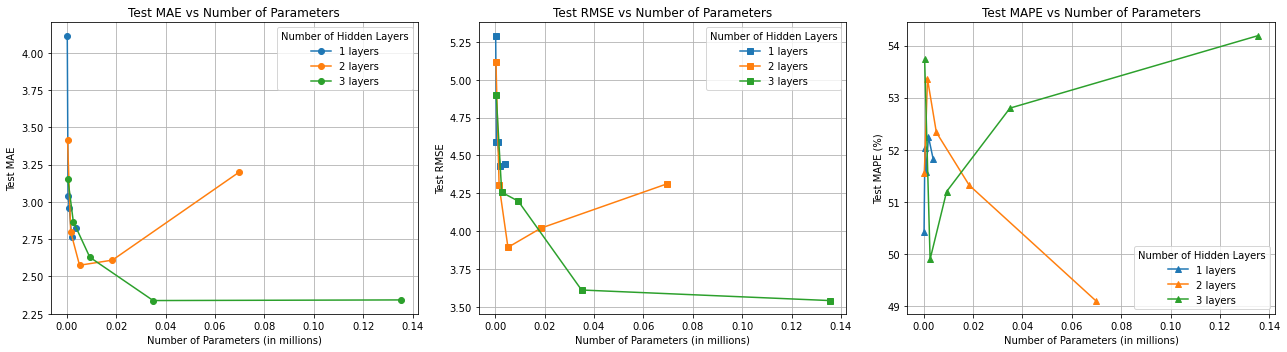

Results Table: Test MSE, MAE, RMSE, and MAPE for Different Models

    Layer Configuration  Params (M)   Test MSE  Test MAE  Test RMSE  \
0    1 layers, 10 nodes    0.000151  27.998122  4.114836   5.291325   
1    1 layers, 32 nodes    0.000481  21.083927  3.039041   4.591724   
2    1 layers, 64 nodes    0.000961  21.049045  2.962039   4.587924   
3   1 layers, 128 nodes    0.001921  19.601242  2.766058   4.427329   
4   1 layers, 256 nodes    0.003841  19.725487  2.828056   4.441338   
5    2 layers, 10 nodes    0.000261  26.187738  3.414919   5.117396   
6    2 layers, 32 nodes    0.001537  18.511457  2.799115   4.302494   
7    2 layers, 64 nodes    0.005121  15.158852  2.575247   3.893437   
8   2 layers, 128 nodes    0.018433  16.159844  2.609608   4.019931   
9   2 layers, 256 nodes    0.069633  18.603709  3.198133   4.313202   
10   3 layers, 10 nodes    0.000371  24.020350  3.155949   4.901056   
11   3 layers, 32 nodes    0.002593  18.119571  2.868088   4.256709   
12   3 lay

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import models
from keras import layers
from sklearn.metrics import mean_squared_error
import pandas as pd

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)  
train_data -= mean  
std = train_data.std(axis=0)
train_data /= std 
test_data -= mean
test_data /= std

def build_model(num_layers, num_nodes):
    model = models.Sequential()
    model.add(layers.Dense(num_nodes, activation='relu', input_shape=(train_data.shape[1],)))
    
    for _ in range(num_layers - 1):  
        model.add(layers.Dense(num_nodes, activation='relu'))

    model.add(layers.Dense(1))  
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  
    return model

layer_counts = range(1, 4)  
node_counts = [10, 32, 64, 128, 256]  
mae_scores = []
mse_scores = []
rmse_scores = []
mape_scores = []
param_counts = []
layer_configs = []

for num_layers in layer_counts:
    for num_nodes in node_counts:
        model = build_model(num_layers, num_nodes)
        model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)  

        test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=0)
        
        test_predictions = model.predict(test_data)
        
        rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))  # RMSE
        mape = np.mean(np.abs((test_targets - test_predictions) / test_targets)) * 100  # MAPE
        
        mae_scores.append(test_mae_score)
        mse_scores.append(test_mse_score)
        rmse_scores.append(rmse)
        mape_scores.append(mape)
        
        param_count = sum(np.prod(layer.get_weights()[0].shape) + np.prod(layer.get_weights()[1].shape) for layer in model.layers if len(layer.get_weights()) > 0)
        param_counts.append(param_count / 1e6)  
        
        layer_configs.append(f"{num_layers} layers, {num_nodes} nodes")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
for idx, num_layers in enumerate(layer_counts):
    color = plt.cm.get_cmap("tab10")(idx) 
    mask = [i for i, config in enumerate(layer_configs) if f"{num_layers} layers" in config]
    plt.plot(np.array(param_counts)[mask], np.array(mae_scores)[mask], marker='o', color=color, label=f'{num_layers} layers')
plt.title('Test MAE vs Number of Parameters')
plt.xlabel('Number of Parameters (in millions)')
plt.ylabel('Test MAE')
plt.grid(True)
plt.legend(title="Number of Hidden Layers")

plt.subplot(1, 3, 2)
for idx, num_layers in enumerate(layer_counts):
    color = plt.cm.get_cmap("tab10")(idx)  
    mask = [i for i, config in enumerate(layer_configs) if f"{num_layers} layers" in config]
    plt.plot(np.array(param_counts)[mask], np.array(rmse_scores)[mask], marker='s', color=color, label=f'{num_layers} layers')
plt.title('Test RMSE vs Number of Parameters')
plt.xlabel('Number of Parameters (in millions)')
plt.ylabel('Test RMSE')
plt.grid(True)
plt.legend(title="Number of Hidden Layers")

plt.subplot(1, 3, 3)
for idx, num_layers in enumerate(layer_counts):
    color = plt.cm.get_cmap("tab10")(idx) 
    mask = [i for i, config in enumerate(layer_configs) if f"{num_layers} layers" in config]
    plt.plot(np.array(param_counts)[mask], np.array(mape_scores)[mask], marker='^', color=color, label=f'{num_layers} layers')
plt.title('Test MAPE vs Number of Parameters')
plt.xlabel('Number of Parameters (in millions)')
plt.ylabel('Test MAPE (%)')
plt.grid(True)
plt.legend(title="Number of Hidden Layers")

plt.tight_layout()
plt.show()

results_df = pd.DataFrame({
    "Layer Configuration": layer_configs,
    "Params (M)": param_counts,
    "Test MSE": mse_scores,
    "Test MAE": mae_scores,
    "Test RMSE": rmse_scores,
    "Test MAPE (%)": mape_scores
})

print("Results Table: Test MSE, MAE, RMSE, and MAPE for Different Models\n")
print(results_df)